# 4. Clustering (2.0 điểm)

Cho dữ liệu data3.txt

Yêu cầu: Đọc dữ liệu, chuẩn hóa dữ liệu (nếu cần) và chọn một thuật toán thích hợp để thực hiện việc phân cụm dữ liệu dựa trên hai cột trong dữ liệu được cung cấp.

### Tiền xử lý dữ liệu

In [1]:
# thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [2]:
df = pd.read_csv('data3.txt',names=['X','y'])
if df.isna().any().any(): # Kiểm tra dữ liệu Null
    print('Có dữ liệu Null.')
else:
    print('Không có dữ liệu Null.')

Không có dữ liệu Null.


In [3]:
print('Dữ liệu có {} dòng, {} cột.'.format(df.shape[0],df.shape[1]))

Dữ liệu có 195 dòng, 2 cột.


In [4]:
df.head()

,X,y
0,1.225,2.7
1,4.125,5.1
2,6.375,8.6
3,10.475,11.3
4,13.475,13.2


In [5]:
df.tail()

,X,y
190,31.275,11.20
191,30.675,14.65
192,29.875,15.65
193,31.425,13.40
194,32.175,12.35


In [6]:
print('Thông tin dữ liệu.')
df.info()

Thông tin dữ liệu.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
X    195 non-null float64
y    195 non-null float64
dtypes: float64(2)
memory usage: 3.1 KB


In [7]:
print('Mô tả dữ liệu.')
df.describe()

Mô tả dữ liệu.


,X,y
count,195.000000,195.000000
mean,20.072692,10.125128
std,10.234654,5.643750
min,0.225000,0.650000
25%,11.375000,5.000000
50%,22.925000,10.050000
75%,29.575000,15.475000
max,32.375000,18.800000


### 1. Vẽ biểu đồ thể hiện mối quan hệ giữa hai cột dữ liệu nói trên. Cho nhận xét dựa trên biểu đồ.

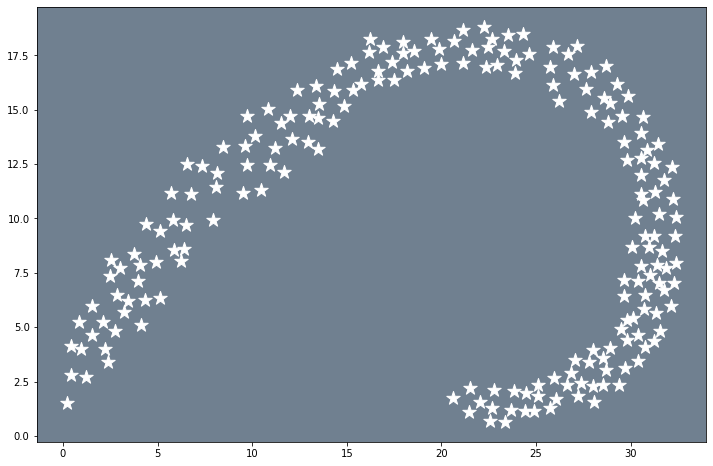

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(df.X,df.y,color='white',marker='*',s=200)
ax.set_facecolor('SlateGray')
plt.show()

**Nhận xét:** Biểu đồ có hình elip, phân bổ tương đối liên tục.

### 2. Áp dụng thuật toán thích hợp để xây dựng model. Dựa trên cơ sở nào để cho rằng thuật toán này thích hợp?

Vì biểu đồ thể hiện xu hướng rõ ràng, sử dụng Gaussian Mixture là phù hợp nhất.

### 3. Tìm kết quả => có bao nhiêu cụm => mẫu nào thuộc cụm nào?

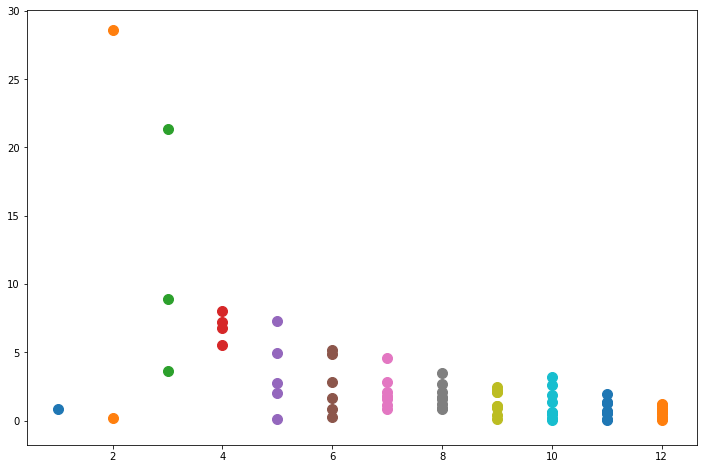

In [9]:
plt.figure(figsize=(12,8))
for k in range(1,13):
    gmm = GaussianMixture(n_components=k)
    gmm.fit(df)
    xk = [k]*k
    yk = [abs(gmm.covariances_[i][0][1]) for i in range(k)] # trị tuyệt đối vì chỉ quan tâm độ tương quan, không quan tâm thuận nghịch
#     plt.scatter(xk,yk,c=['blue','red','yellow','green','purple','blue','red','yellow','green','purple'][k-1],s=200)
    plt.scatter(xk,yk,s=100)
plt.show()

Qua biểu đồ covariance với số cụm k từ 1 đến 12, ta thấy có thể chọn k = 3 hoặc k = 4 là số lượng cụm phù hợp với covariance cao và đồng đều.

In [10]:
gmm = GaussianMixture(n_components=3)
gmm.fit(df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

Kết quả:

In [11]:
df['cluster'] = gmm.predict(df)
df.head(10)

,X,y,cluster
0,1.225,2.70,2
1,4.125,5.10,2
2,6.375,8.60,2
3,10.475,11.30,2
4,13.475,13.20,2
5,15.775,16.20,2
6,19.975,17.10,1
7,27.625,15.95,1
8,29.625,13.50,1
9,30.675,10.85,0


### 4. Nhận xét trên cụm.

Các cụm được phân bổ rõ rệt, dữ liệu từng cụm đi theo xu hướng của cụm.

In [12]:
print(gmm.weights_)

[0.40147047 0.23109822 0.36743132]


In [13]:
print(gmm.covariances_)

[[[10.018613    8.89719745]
  [ 8.89719745 14.3477569 ]]

 [[17.3915359  -3.59429476]
  [-3.59429476  1.71532108]]

 [[25.74115383 21.38664717]
  [21.38664717 19.64492853]]]


In [14]:
print(gmm.means_)

[[28.74599523  5.74620319]
 [24.06832771 16.86794566]
 [ 8.08280736 10.66878349]]


### 5. Với X_new như sau thì mỗi mẫu sẽ lần lượt thuộc cụm nào?

In [15]:
X_new = [[5.5, 9.5], [16.5, 15.5], [30.0, 10.0], [29.375, 3.0]]
y_new = gmm.predict(X_new)
print('X_new 0, 1, 2, 3 lần lượt thuộc các cụm {}.'.format(y_new))

X_new 0, 1, 2, 3 lần lượt thuộc các cụm [2 2 0 0].


### 6. Vẽ hình (với mỗi cụm là một màu), trên hình có biểu diễn luôn kết quả của X_new.

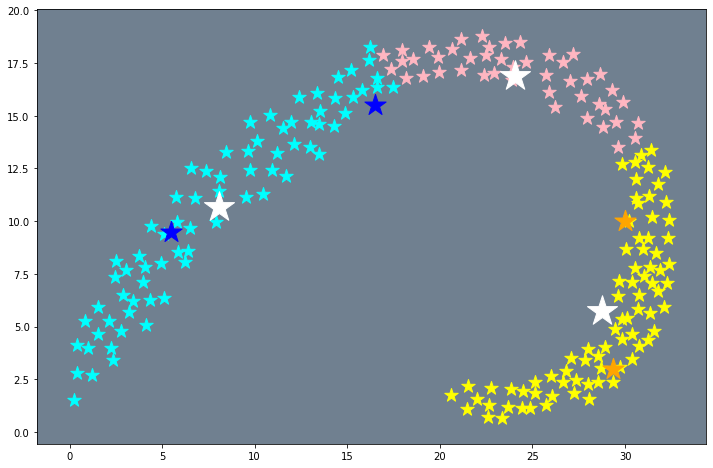

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
for i in range(df.shape[0]):
    ax.scatter(df.iloc[i][0],df.iloc[i][1],c=['yellow','LightPink','aqua'][int(df.iloc[i][2])],marker='*',s=200)
ax.scatter(gmm.means_[:,0],gmm.means_[:,1],color='white',marker='*',s=1000)
for i in range(len(X_new)):
    ax.scatter(np.array(X_new)[i,0],np.array(X_new)[i,1],c=['orange','purple','blue'][y_new[i]],marker='*',s=500)
ax.set_facecolor('SlateGray')
plt.show()